## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
unique_users = df.user_id.unique().size
unique_users

290584

d. The proportion of users converted.

In [5]:
converted_users = df[df.converted == 1]['converted'].count()
prop_conv = converted_users/unique_users
prop_conv

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:

tr_lnd = df.query('group == "treatment" and landing_page != "new_page"')
tr_lnd2 = df.query('group != "treatment" and landing_page == "new_page"')
tr_lnd.count() + tr_lnd2.count()
bad_df = pd.concat([tr_lnd, tr_lnd2])
bad_df.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[~df.index.isin(bad_df.index)]
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.unique().size

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
2893

2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(subset=['user_id'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
converted_prob = (df2['converted'] == 1).sum() / df2.user_id.count()

In [15]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control_group = df2.query('group == "control"')
converted_control = control_group[control_group.converted == 1]
p_control = converted_control.count()/control_group.count()
p_control

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment_group = df2.query('group == "treatment"')
converted_treatment = treatment_group[treatment_group.converted == 1]
p_treatment = converted_treatment.count()/treatment_group.count()
p_treatment

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

In [331]:
diff = p_control - p_treatment
actual_diff = diff.user_id
actual_diff

0.0015782389853555567

d. What is the probability that an individual received the new page?

In [22]:
(df2.landing_page == 'new_page').sum() / df2.user_id.count()

0.50006194422266881

In [23]:
df2.query('landing_page == "old_page" and group == "treatment"')

,user_id,timestamp,group,landing_page,converted


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

There is no evedince that treatment page leads to more conversitiom. 
P(converted|control) ~ 0.12
P(converted|treatment) ~ 0.12
So probabilities to be converted alsmost equal in both groups and further more overall P(converted) is also 0.12. So fot now it looks like there is no difference in convertation from both groups rather than treatment group leads to more conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}:$ **$p_{old}$** >= **$p_{new}$**    
$H_{1}:$ **$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [24]:
size_control= df2.query('group == "control"').user_id.nunique()
size_treatment = df2.query('group == "treatment"').user_id.nunique()


In [25]:
df2.query('group == "control"').user_id.nunique()/df2.user_id.count()

0.49993805577733119

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
converted_prob

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
converted_prob

0.11959708724499628

c. What is $n_{new}$?

In [28]:
size_treatment

145310

d. What is $n_{old}$?

In [29]:
size_control

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
sample_single_treat = treatment_group.sample(size_treatment, replace = True)
new_page_converted = (sample_single_treat['converted'] == 1).sum() / sample_single_treat.user_id.count()
new_page_converted

0.12027389718532792

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
sample_single_contrl = control_group.sample(size_control, replace = True)
old_page_converted = (sample_single_contrl['converted'] == 1).sum() / sample_single_contrl.user_id.count()
old_page_converted

0.11869983617164806

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
new_diff = new_page_converted - old_page_converted
new_diff

0.0015740610136798644

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [38]:
p_diffs = []
for _ in range(10000):
    sample_single_treat = treatment_group.sample(size_treatment, replace = True)
    new_page_converted = (sample_single_treat['converted'] == 1).sum() / sample_single_treat.user_id.count()
    
    sample_single_contrl = control_group.sample(size_control, replace = True)
    old_page_converted = (sample_single_contrl['converted'] == 1).sum() / sample_single_contrl.user_id.count()
    
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

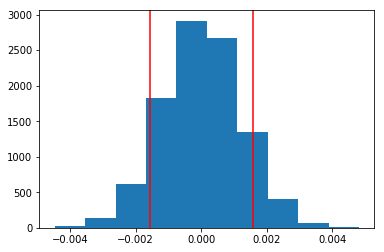

In [244]:
p_diffs = np.array(p_diffs)
null_val  = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_val)
plt.axvline(x=new_diff, color='red')
h = 0 + (0 - new_diff)
plt.axvline(x=h, color='red')

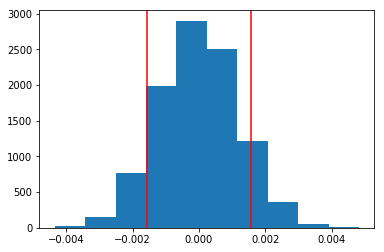

In [286]:
p_diffs_new = (np.random.binomial(size_treatment, converted_prob, 10000)/size_treatment) - (np.random.binomial(size_control, converted_prob, 10000)/size_control)
null_val  = np.random.normal(0, p_diffs_new.std(), p_diffs_new.size)
plt.hist(null_val)
plt.axvline(x=new_diff, color='red')
h = 0 + (0 - new_diff)
plt.axvline(x=h, color='red')

In [287]:
m = p_diffs.mean()
m1 = p_diffs_new.mean()
m1

-2.4293115506381952e-06

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [348]:
(null_val < actual_diff).mean()

0.90649999999999997

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
Above observed that statistics likely from our null. We got P-value is equal to .9 and that suggests we should stay with the idea of $p_{new}$ - $p_{old}$ <=0 . 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [317]:
np.random.binomial(size_treatment, converted_prob, 10000).mean()

17378.691800000001

In [318]:
import statsmodels.api as sm


convert_old = np.random.binomial(size_treatment, converted_prob, 10000).mean()
convert_new = np.random.binomial(size_control, converted_prob, 10000).mean()

n_old = size_control
n_new = size_treatment

In [320]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value 

(0.038444553240738366, 0.96933323887030798)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [321]:
from scipy.stats import norm
norm.cdf(z_score), norm.ppf(1-(0.05/2))

(0.51533338056484601, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

z-score 0.51533 doesnt exceed critical value 1.95996. So if calculated Z value is less than critical value of 95% confident interval we fail to reject null.
Overall agree with the findings in j,k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [72]:
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2[['old_page', 'new_page']] = pd.get_dummies(df2['landing_page'])
df2['intercept'] = 1

In [73]:
df2.head()

,user_id,timestamp,group,landing_page,converted,isConverted,control,treatment,intercept,old_page,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [83]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

lm = sm.Logit(df2['converted'], df2[['control', 'intercept']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        20:26:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
control        0.0150      0.011      1.311      0.190      -0.007       0.037
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
np.exp(0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

If we get rid of all parameters but control we will see same p-values as we saw above ~ 0.190 and z-score ~ 1.31. So given that we know control group receives old page and treatment receives new page the outcome here is users in control group 1.015 as likely converted than those are in treatment group. But such small difference in conversitions between old and new page is not enough to be a value in practical sense. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Looking at provided data there is not that much options to include but for sure we could look at time stamp to see on which time intervals most users were converted. That could give us insights and ideas if the cycle was long enough or if there were any events which impacted conversion rate or just day/night, weekdays/weekends proportions.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [89]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [95]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new.country)

In [100]:
lm2 = sm.Logit(df_new['converted'], df_new[['control', 'US', 'UK','intercept']])
res = lm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 24 Dec 2017   Pseudo R-squ.:               2.323e-05
Time:                        21:27:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
control        0.0149      0.011      1.307      0.191      -0.007       0.037
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [102]:
lm3 = sm.OLS(df_new['converted'], df_new[['intercept', 'UK', 'US', 'control']])
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Mon, 25 Dec 2017   Prob (F-statistic):              0.178
Time:                        10:51:33   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1145      0.003     41.494      0.000       0.109       0.120
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
US             0.0042      0.003      1.514      0.130      -0.001       0.010
control        0.0016      0.001      1.307      0.191      -0.001       0.004
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='conclusions'></a>
## Conclusions

For the user based in Canada we predicted our conversion rate to be 11.5% , US is predicted to be 0.5% more than in Canada and UK is predicted to be 0.4% more than Canadian given control group (old page) that is to be predicted 0.2% higher than treatment group (new page). So it looks like factor of country doesnt affect conversion rates greatly. Results of AB testing is not clear to state anything. For now the only outcome we could provide is either no difference between two pages in conversion rates or not enough attributes to base our analysis on (we could also include time intervals to see how it would affect result). In this particular case there is no practical significance and statistical proof that switching to the new page would give us increase in conversion rates.